## <font color='orange'><b>Import libraries</b></font>

In [1]:
# Import this library
from nbacktest import Backtest, Strategy

# Import other libraries
import yfinance as yf
import quantstats as qs

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <font color='orange'><b>Create Strategy</b></font>

In [2]:
class TestStrategy (Strategy):

    def on_start(self):

        print("Strategy started!")
        
        quantity1 = int((self.broker.balance/2)/self.close["AAPL"])
        quantity2 = int((self.broker.balance/2)/self.close["GOOG"])

        order1 = self.buy("AAPL", quantity1)
        order2 = self.buy("GOOG", quantity2)

        print("Bought %s AAPL and %s GOOG" % (quantity1, quantity2))


    def on_end(self):
        """"
        This function is called when the backtest of all candles is finished
        """
        print("Strategy finished!")


    def next(self):
        """"
        This function is called every candle (iteration)
        """
        #print("Backtest iteration:", self.iteration)
        pass


## <font color='orange'><b>Download OHLC Data from Yahoo Finance</b></font>

In [3]:
universe = ["AAPL", "GOOG"] # List containing the tickers of all the assets you are backtesting

ohlc = yf.download(universe, start="2018-01-01", end="2023-01-01", interval="1d") # Download OHLC data from Yahoo Finance

print(ohlc.shape)
ohlc.tail()


[*********************100%***********************]  2 of 2 completed
(1259, 12)


Adj Close                  Close                   High  \
                  AAPL       GOOG        AAPL       GOOG        AAPL   
Date                                                                   
2022-12-23  131.299820  89.809998  131.860001  89.809998  132.419998   
2022-12-27  129.477585  87.930000  130.029999  87.930000  131.410004   
2022-12-28  125.504539  86.459999  126.040001  86.459999  131.029999   
2022-12-29  129.059372  88.949997  129.610001  88.949997  130.479996   
2022-12-30  129.378006  88.730003  129.929993  88.730003  129.949997   

                              Low                   Open               Volume  \
                 GOOG        AAPL       GOOG        AAPL       GOOG      AAPL   
Date                                                                            
2022-12-23  90.099998  129.639999  87.620003  130.919998  87.620003  63814900   
2022-12-27  89.500000  128.720001  87.535004  131.380005  89.309998  69007800   
2022-12-28  88.519997  125.870003  86.370003  129.669998  87.500000  85438400   
2022-12-29  89.364998  127.730003  86.989998  127.989998  87.029999  75703700   
2022-12-30  88.830002  127.430000  87.029999  128.410004  87.364998  77034200   

                      
                GOOG  
Date                  
2022-12-23  17815000  
2022-12-27  15470900  
2022-12-28  17879600  
2022-12-29  18280700  
2022-12-30  19190300

## <font color='orange'><b>Run Backtest</b></font>

In [4]:
bt = Backtest(data=ohlc, universe=universe, strategy=TestStrategy, cash=10_000)

result = bt.run()

Strategy started!
Bought 122 AAPL and 93 GOOG
Strategy finished!


## <font color='orange'><b>Backtest Statistics</b></font>

In [5]:
print("---------------------------")
print("Final balance: %.2f" % bt.broker.balance)
print("Final equity: %.2f" % bt.broker.equity)
print("---------------------------")

bt.broker.orderbook

---------------------------
Final balance: 73.01
Final equity: 24109.02
---------------------------


,iteration,action,ticker,quantity,price,commission,slippage,total
id,,,,,,,,
0,0,buy,AAPL,122,40.776524,0,0,-4974.735878
1,0,buy,GOOG,93,53.250000,0,0,-4952.250000


In [6]:
bt.broker.positions

,quantity,commission,slippage,total_invested,value
ticker,,,,,
AAPL,122,0,0,-4974.735878,15784.116730
GOOG,93,0,0,-4952.250000,8251.890312


## <font color='orange'><b>Performance Report from QuantStats</b></font>

In [7]:
qs.reports.metrics(returns=result["_equity"], benchmark="SPY", rf=0.00, mode="basic")
#qs.reports.html(returns=result["_equity"], benchmark="SPY", rf=0.00, title="TestStrategy")

[*********************100%***********************]  1 of 1 completed


c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


                    Benchmark (SPY)    Strategy
------------------  -----------------  ----------------------
Start Period        2018-01-02         2018-01-02
End Period          2022-12-30         2022-12-30
Risk-Free Rate      0.0%               0.0%
Time in Market      100.0%             100.0%

Cumulative Return   42.29%             -
CAGR﹪              5.0%               12.81%

Sharpe              0.44               0.73
Prob. Sharpe Ratio  83.26%             95.0%
Sortino             0.6                1.04
Sortino/√2          0.42               0.74
Omega               1.14               1.14

Max Drawdown        -34.1%             -
Longest DD Days     361                1712

Gain/Pain Ratio     0.09               0.14
Gain/Pain (1M)      0.44               0.79

Payoff Ratio        0.87               0.89
Profit Factor       1.09               -
Common Sense Ratio  0.92               1.05
CPC Index           0.51               0.56
Tail Ratio          0.84               3.3

c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\scipy\stats\_distn_infrastructure.py:

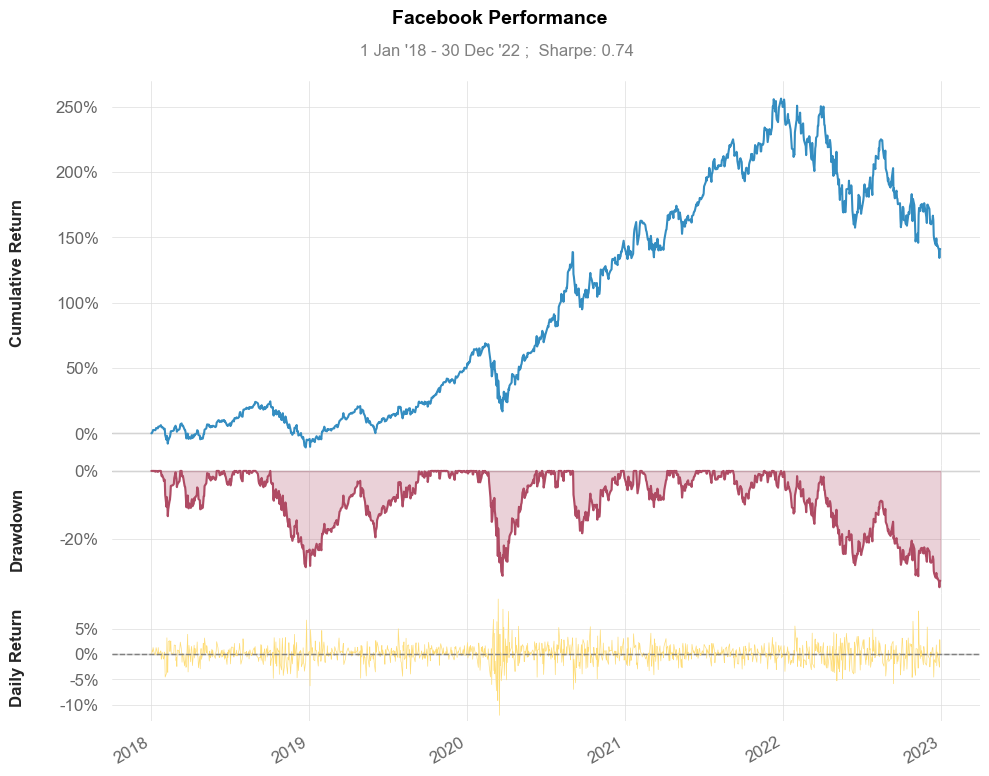

In [8]:
%matplotlib inline
qs.plots.snapshot(result["_equity"], title='Facebook Performance', show=True)